In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import natsort
from openpyxl import load_workbook
import random
from random import randrange
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

from keras import models
from keras import layers
from tensorflow.keras.models import load_model

Using TensorFlow backend.


IMPORT MODEL AND DATA

In [2]:
#load certain model
model = load_model('./for_old22/reverse_MFCC_Dense_Classifier_l-3_u-512_e-1000_1588062326.h5')
# plot_model(model, to_file='reverse_MFCC_Dense_Classifier_l-3_u-512_e-1000_1587587381.png', show_shapes=True,show_layer_names=True)

In [2]:
#read training dataset from csv
#music
data6_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_10ms_R.csv')
data6_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_50ms_R.csv')
data6_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_100ms_R.csv')
data6_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_500ms_R.csv')
data6_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_1000ms_R.csv')

#speech
data5_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_10ms_R.csv')
data5_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_50ms_R.csv')
data5_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_100ms_R.csv')
data5_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_500ms_R.csv')
data5_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_1000ms_R.csv')

#join
data = pd.concat([data6_10, data6_50, data6_100, data6_500, data6_1000, data5_10, data5_50, data5_100, data5_500, data5_1000])
print(data.shape)

(210400, 242)


GET TOTAL NUMBER OF FILES PER TYPE <br>
i.e. get number of entries per dataset (5,6) OR number of entries per IR-length (10,50,100,500,1000)

In [4]:
investigate_differencess_between_datasets = 1
# else investigate between IR lenght

In [6]:
#AGGREGATE ALL DATA AND CALCULATE TOTAL LENGTH
if investigate_differencess_between_datasets:
    L5 = len(data5_10) + len(data5_50) + len(data5_100) + len(data5_500) + len(data5_1000)
    L6 = len(data6_10) + len(data6_50) + len(data6_100) + len(data6_500) + len(data6_1000)
    print(f'number of music samples: {L6}')
    print(f'number of speech samples: {L5}')
    data = pd.concat([data5_10, data5_50, data5_100, data5_500, data5_1000, data6_10, data6_50, data6_100, data6_500, data6_1000])

else:
    L_10 = len(data5_10) + len(data6_10) + len(data7_10)
    L_50 = len(data5_50) + len(data6_50) + len(data7_50)
    L_100 = len(data5_100) + len(data6_100) + len(data7_100)
    L_500 = len(data5_500) + len(data6_500) + len(data7_500)
    L_1000 = len(data5_1000) + len(data6_1000) + len(data7_1000)

    print(f'number of IR_10ms samples: {L_10}')
    print(f'number of IR_50ms samples: {L_50}')
    print(f'number of IR_100ms samples: {L_100}')
    print(f'number of IR_500ms samples: {L_500}')
    print(f'number of IR_1000ms samples: {L_1000}')
    data = pd.concat([data5_10, data6_10, data5_50, data6_50, data5_100, data6_100, data5_500, data6_500, data5_1000, data6_1000])

print()
print(f'number of rows: {data.shape[0]}')
#randomly display some of the data
print('random selection of rows:')
data_subset = data.sample(n=5)
data_subset.head()

number of music samples: 88001
number of speech samples: 122399

number of rows: 210400
random selection of rows:


,filename,mfccM0,mfccV0,mfccM1,mfccV1,mfccM2,mfccV2,mfccM3,mfccV3,mfccM4,...,deltaDeltaV35,deltaDeltaM36,deltaDeltaV36,deltaDeltaM37,deltaDeltaV37,deltaDeltaM38,deltaDeltaV38,deltaDeltaM39,deltaDeltaV39,label
1987,27_h_1000_246-122825-0004.wav,-416.093109,148.479630,62.943474,154.302719,44.430290,69.750710,37.099144,63.597519,30.849112,...,0.011713,-0.001734,0.011180,0.001844,0.009569,0.000819,0.007506,-0.002410,0.009261,27
14726,297_h_100_music-jamendo-0021.wav,-459.768555,303.212585,36.240799,408.428040,25.431364,185.899185,19.893253,109.168083,17.845932,...,0.004341,0.000554,0.005769,0.000543,0.004451,0.000945,0.002914,0.000936,0.003476,297
5292,72_h_10_6269-66184-0009.wav,-432.019928,179.983429,46.574120,230.563202,37.978073,98.006355,31.135986,55.946045,27.142733,...,0.025078,-0.001860,0.018691,-0.000428,0.012757,0.000369,0.012458,-0.000304,0.006956,72
732,9_h_1000_music-jamendo-0146.wav,-453.128693,350.797821,53.671192,392.332611,42.662014,185.249908,35.451729,106.353699,30.139868,...,0.011813,-0.001416,0.008932,0.000202,0.007212,0.001035,0.008600,0.000264,0.010652,9
3967,54_h_50_4731-95870-0035.wav,-438.272766,327.277618,41.652279,401.959534,32.408417,217.336243,26.441839,148.426758,23.544046,...,0.020065,-0.002461,0.014275,0.000401,0.009528,0.001256,0.012212,0.000377,0.008002,54


PREPARING DATA

In [5]:
#dropping unneccesary columns and storing filenames elsewhere
fileNames = data['filename']
data = data.drop(['filename'],axis=1)
fileNames.head()

0    0_h_10_music-fma-0001.wav
1    0_h_10_music-fma-0002.wav
2    0_h_10_music-fma-0004.wav
3    0_h_10_music-fma-0005.wav
4    0_h_10_music-fma-0006.wav
Name: filename, dtype: object

In [6]:
#making labels
labels_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(labels_list)
print(y)
print(y.shape)

[ 0  0  0 ... 39 39 39]
(210400,)


In [7]:
# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

MAKE PREDICTIONS AND EVALUATE

In [8]:
#make prediction for each sample in X and evaluate entire model to get an idea of accuracy
predictions = model.predict(X)
test_loss, test_acc = model.evaluate(X,y)

210400/210400 [==============================] - 11s 52us/sample - loss: 0.2191 - accuracy: 0.9354


COMPUTE SOME GENERAL STATISTICS

In [9]:
#method to get difference between elements on circular scale
def absolute_diff(int1,int2):
    m_min = min(int1,int2)
    m_max = max(int1,int2)
    diff1 = m_max-m_min
    diff2 = m_min + 40 - m_max
    return diff1 if diff1 <=20 else diff2

In [10]:
##COMPUTE STATISTICS
#compare all predicitons to labels and plot histogram
#simple version: only compare most likely prediciont vs label
#future version could compare each possible prediciont vs label
labels = y
predictions = predictions
#check which errors occur and add 1 to each index
occuring_errors = np.zeros(21)
hardest_to_predict = np.zeros(40)

for i in range(predictions.shape[0]):
    label = labels[i]
    predicted = np.argmax(predictions[i])
    error = absolute_diff(predicted,label)
    occuring_errors[error] = occuring_errors[error] + 1
    if error != 0:
        hardest_to_predict[label] += 1 
        
arr =  np.zeros(labels.shape[0])
for i in range(labels.shape[0]):
    arr[i] = np.argmax(predictions[i])
confusion_array = confusion_matrix(labels, arr)

PLOT STATISTICS

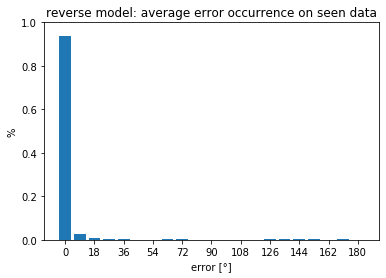

97% of predictions are correct within 45°
98% of predictions are correct within 90°


In [12]:
#ERROR OCCURENCE
x_as = np.array(range(21))
avg_occuring_errors = occuring_errors/(labels.shape[0])
plt.bar(x_as,avg_occuring_errors)
plt.title('reverse model: average error occurrence on seen data')
plt.ylabel('%')
plt.ylim([0,1])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_error_seen_data'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();
error_45 = np.sum(avg_occuring_errors[0:5])
print(f'{int(error_45*100)}% of predictions are correct within 45°')
error_90 = np.sum(avg_occuring_errors[0:10])
print(f'{int(error_90*100)}% of predictions are correct within 90°')

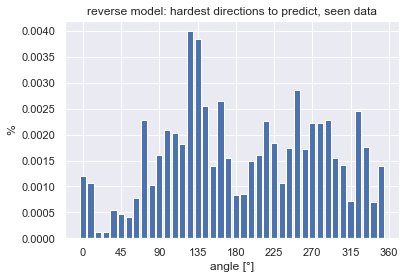

In [15]:
#HARDEST TO PREDICT
x_as = np.array(range(40))
avg_hardest_to_predict = hardest_to_predict/(labels.shape[0])
plt.bar(x_as,avg_hardest_to_predict)
plt.title('reverse model: hardest directions to predict, seen data')
plt.ylabel('%')
plt.xlabel('angle [°]')
plt.xticks([0,5,10,15,20,25,30,35,40], [ 0,45,90,135,180,225,270,315,360])
plt.show();

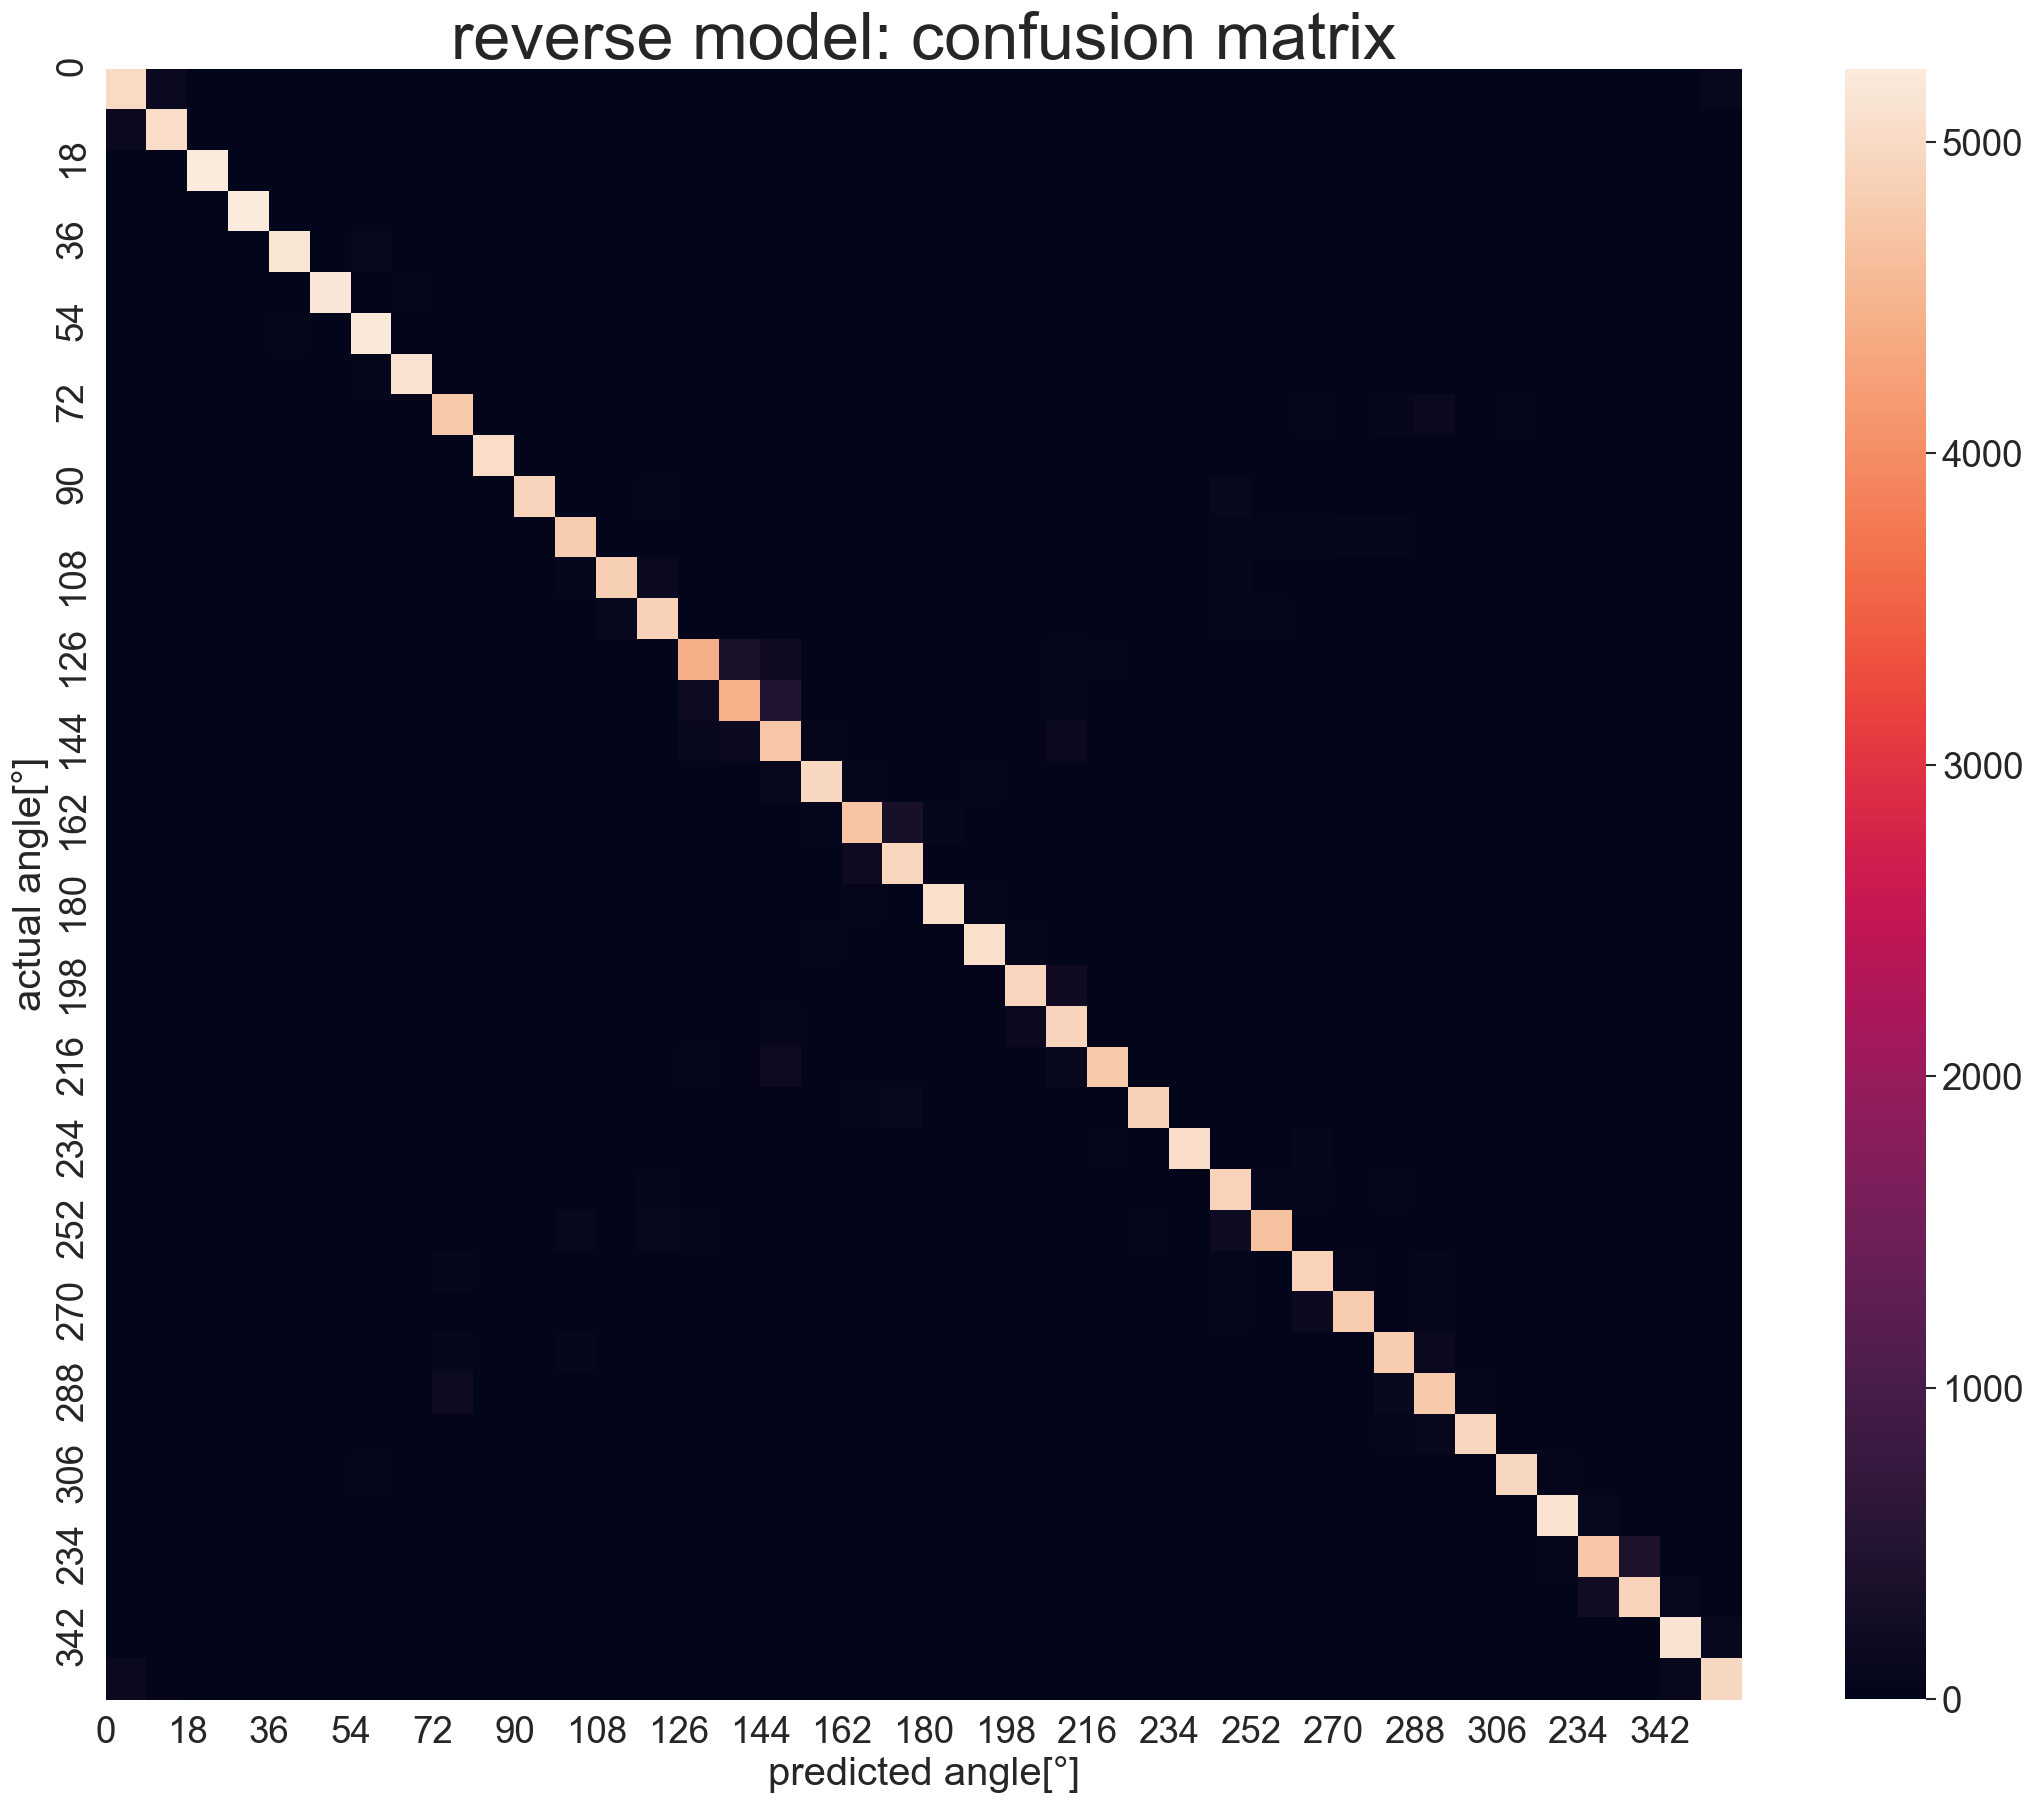

In [14]:
#CONFUSION MATRIX
df_cm = pd.DataFrame(confusion_array, range(40), range(40))
norm_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = norm_cmplt.figure(figsize=(22,18),dpi=120)
sn.set(font_scale=2) # set label size
sn.heatmap(df_cm) # font size
plt.yticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,234,342])
plt.xlabel('predicted angle[°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,234,342])
plt.ylabel('actual angle[°]')
plt.title('reverse model: confusion matrix',fontsize=40)
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_confusion_seen_data'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show()
sn.set(font_scale=1) # reset label size

label:
16
predicted:
16


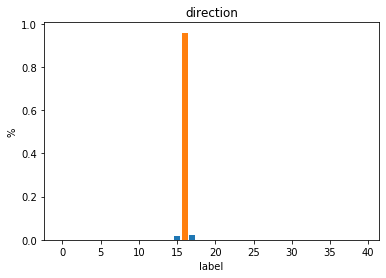

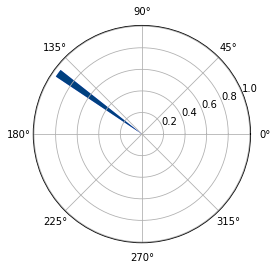

In [9]:
#RANDOMLY SELECT 1 INDEX AND COMPARE THE LABEL VS THE PREDICTION
index = randrange(0,X.shape[0])
label = y[index]
print("label:")
print(label)
print("predicted:")
print(np.argmax(predictions[index]))
#linear bar plot
plt.bar(np.arange(len(predictions[index,:])),predictions[index,:], align='center', alpha=1)
labels = np.zeros((40,))
labels[label] = np.amax(predictions[index])
plt.bar(np.arange(len(predictions[index,:])),labels[:], align='center', alpha=1)
plt.ylabel('%')
plt.xlabel('label')
plt.title('direction')
plt.show()
#polar bar plot
N = 40
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / 40 

ax = plt.subplot(111, projection='polar')
ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
plt.show()

In [12]:
#method to aggregate predictions: make prediction based on surrounding probabilities
#go around 360° or 40labels
#sum current probabilitye, preivous 2 probabilities and next 2 probabilities to get resolution of 45°
def smart_prediction(predictions):
    be = np.zeros(40)
    for i in range(40):
        #2 back
        index = i-2
        if index < 0:
            index = 40+i-2
        predicted_b2 = predictions[index]
        index = i
        #1 back
        index = i-1
        if index < 0:
            index = 40+i-1
        predicted_b1 = predictions[index]
        index = i
        #current
        predicted = predictions[index]
        #1 forward
        index = i+1
        if index > 39:
            index = 0
        predicted_f1 = predictions[index]
        index = i
        #2 forward
        index = i+2
        if index > 39:
            index = 0+1-(39-i)
        predicted_f2 = predictions[index]
        
        s = (predicted_b2 + predicted_b1 + predicted + predicted_f1 + predicted_f2)
        be[i] = s
    return np.argmax(be)

label: 18 	 predict: 18
label: 32 	 predict: 32
label: 13 	 predict: 13
label: 29 	 predict: 29
label: 33 	 predict: 33
label: 26 	 predict: 26
label: 9 	 predict: 9
label: 25 	 predict: 25
label: 8 	 predict: 8
label: 37 	 predict: 37
label: 4 	 predict: 4
label: 16 	 predict: 16
label: 18 	 predict: 18
label: 1 	 predict: 1
label: 27 	 predict: 28	 error: 1
label: 26 	 predict: 26
label: 13 	 predict: 13
label: 36 	 predict: 36
label: 19 	 predict: 19
label: 19 	 predict: 19
label: 31 	 predict: 31
label: 16 	 predict: 16
label: 28 	 predict: 28
label: 15 	 predict: 15
label: 20 	 predict: 20
label: 24 	 predict: 24
label: 14 	 predict: 14
label: 29 	 predict: 29
label: 24 	 predict: 31	 error: 7
label: 24 	 predict: 31	 error: 7	 smart_predict: 31	 smart_error: 7


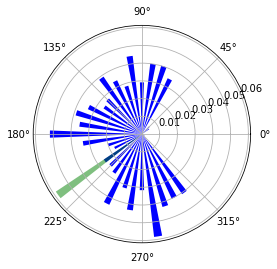

216_h_100_music-fma-0056.wav

label: 15 	 predict: 14	 error: 1
label: 15 	 predict: 16	 error: 1
label: 34 	 predict: 34
label: 35 	 predict: 35
label: 6 	 predict: 6
label: 33 	 predict: 33
label: 9 	 predict: 9
label: 38 	 predict: 38
label: 9 	 predict: 9
label: 18 	 predict: 18
label: 5 	 predict: 7	 error: 2
label: 33 	 predict: 33
label: 39 	 predict: 39
label: 33 	 predict: 33
label: 9 	 predict: 9
label: 19 	 predict: 25	 error: 6
label: 19 	 predict: 25	 error: 6	 smart_predict: 26	 smart_error: 7


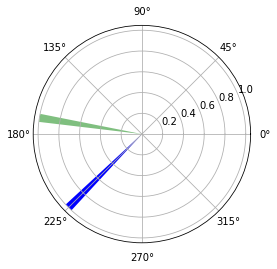

171_h_10_5389-4861-0014.wav

label: 11 	 predict: 11
label: 29 	 predict: 29
label: 17 	 predict: 17
label: 38 	 predict: 38
label: 28 	 predict: 28
label: 29 	 predict: 29
label: 16 	 predict: 16
label: 10 	 predict: 10
label: 6 	 predict: 6
label: 15 	 predict: 16	 error: 1
label: 30 	 predict: 30
label: 12 	 predict: 12
label: 31 	 predict: 31
label: 4 	 predict: 4
label: 39 	 predict: 39
label: 14 	 predict: 14
label: 25 	 predict: 25
label: 22 	 predict: 22
label: 15 	 predict: 15
label: 35 	 predict: 35
label: 1 	 predict: 1
label: 3 	 predict: 3
label: 3 	 predict: 3
label: 21 	 predict: 21
label: 22 	 predict: 22
label: 5 	 predict: 5
label: 5 	 predict: 5
label: 13 	 predict: 12	 error: 1
label: 24 	 predict: 24
label: 29 	 predict: 29
label: 29 	 predict: 29
label: 14 	 predict: 14
label: 33 	 predict: 33
label: 5 	 predict: 5
label: 36 	 predict: 36
label: 10 	 predict: 10
label: 15 	 predict: 15
label: 12 	 predict: 12
label: 14 	 predict: 14
label: 6 	 predict: 6
label: 16

In [13]:
#RANDOMLY SELECT A HUNDRED SAMPLES AND PLOT THOSE WHO ARE OF BY MORE THAN 45° AND SAVE THOSE
save_fig_location = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/reverse_Mel_scale/seen'
counter = 0
randomIndexes = random.sample(range(0,X.shape[0]),100)
allErrors = []
for index in randomIndexes:
    label = y[index]
    predicted = np.argmax(predictions[index])
    output = f'label: {label} \t predict: {predicted}'
    error = absolute_diff(predicted,label)
    error = absolute_diff(predicted,label)
    if error != 0:
        output += f'\t error: {error}'
        allErrors.append(error)
    print(output)
    if error >5:
        smart_pred = smart_prediction(predictions[index])
        output += f'\t smart_predict: {smart_pred}'
        smart_error = absolute_diff(smart_pred,label)
        output += f'\t smart_error: {smart_error}'
        print(output)
        labels = np.zeros((40,))
        labels[label] = np.amax(predictions[index])
        ax = plt.subplot(111, projection='polar')
        ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
        ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
        plt.savefig(f'{save_fig_location}/{fileNames.iloc[index]}.png')
        plt.show()
        print(fileNames.iloc[index])
        print()
        counter += 1
print(f'{counter} of {len(randomIndexes)} were off by more than 45°')
allErrors = np.array(allErrors)
m_mean = np.round(np.mean(allErrors))
m_max = np.amax(allErrors)
print(f'average error is {m_mean} or {m_mean*9}°')
print(f'max error is {m_max} or {m_max*9}°')